## 1. Tworzenie hipotezy

### Stwierdzenie problemu:

#### "BigMart zebrał w 2013 roku dane dotyczące sprzedaży dla 1559 produktów, z 10 sklepów w różnych miastach. Pewne atrybuty dla produktów i sklepów zostały zdefinowane. Celem jest stworzenie modelu predykcji i sprawdzenie jaka jest sprzedaż dla każdego produktu w konkretnym sklepie.
#### Używając tego modelu BigMart będzie starał się zrozumieć właściwości produktów i sklepów, co stanowi kluczową rolę w zwiększeniu sprzedaży."
#### Czyli musimy znajeźć właściwości produktu i sklepu, które wpływają na sprzedaż produktu.

dane ze strony: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


### Opis danych:
- Item_Identifier - unikalne ID produktu
- Item_Weight - waga produktu
- Item_Fat_Content - czy produkt ma niską zawartość tłuszczu, czy zwyczajną
- Item_Visibility - % obszaru eksponowania wszystkich produktów w sklepie przypisane do konkretnego produktu
- Item_Type kategoria do którego należy produkt
- Item_MRP - Maximum Retail Price - maksymalna cena detaliczna produktu
- Outlet_Identifier - unikalen ID sklepu
- Outlet_Establishment_Year - rok w którym otwarto sklep
- Outlet_Size - wielkość sklepu w rozumieniu jaką powierzchnię zajmuje (mały, średni itd)
- Outlet_Location_Type - typ miasta w jakim jest sklep
- Outlet_Type - typ sklepu (supermarket, spożywczy, itd)
- Item_Outlet_Sales - sprzedaż produktu w danym sklepie - zmienna do przewidywania


### Hipotezy

#### Sklep:

1. **Typ miasta**: sklepy zlokalizowane w terenach zurbanizowanych albo w poziomie 1 (Tier 1) powinny mieć większą sprzedaż, ponieważ z reguły ludzie zarabiają tam więcej.
2. **Gęstość (density) populacji**: sklepy zlokalizowane w obszarach z większą liczbą ludzi powinny mieć większą sprzedaż, ponieważ jest większe zapotrzebowanie.
3. **Wielkość sklepu**: większe sklepy powinny więcej sprzedawać - ludzie znajdują w nich więcej towarów i raczej wszystko kupują w jednym miejscu.
4. **Konkurencja**: większa konkurencja = mniejsza sprzedaż.
5. **Marketing**: Lepszy marketing = większa sprzedaż.
6. **Lokacja**: lokacja w popularnych miejscach wiąże się ze zwiększoną sprzedażą. 
7. **Zachowanie klientów**: sklepy z odpowiednim zaopatrzeniem, spełniającym zapotrzebowanie klientów mają większą sprzedaż.
8. **Atmosfera**: Jeżeli atmosfera (np. miła obsługa) jest odpowiednia to klienci będą chętniej do nas wracać

#### Produkt:
1. **Marka**: produkty markowe powinny mieć większą sprzedać ponieważ klienci mają większe zaufanie do nich.
2. **opakowanie**: odpowiednie opakowania mogą przyciągnąć klientów.
3. **Przydatność**: produkty dziennej potrzeby (np. chleb) częściej się sprzedają niż produkty specjalistyczne
4. **Widoczność**: produkty, które mają lepszą widoczność (np. są lepiej rozlokowane, większa półka, na wyciągnięcie ręki) częściej przyciągają klientów.
5. **reklama**: lepsza reklama = większa sprzedaż.
6. **Oferty promocyjne**: produkty w lepszej cenie i z rabatem sprzedają się lepiej. 

## 2. Eksploracja danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set_style('whitegrid')

In [2]:
# df = pd.read_csv('Dane\Train_2.txt')
train= pd.read_csv('Dane/Train_2.txt')
test= pd.read_csv('Dane/Test_2.txt')

train['source']='train'
test['source']='test'

df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\Anaconda3\envs\av\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
df.head()

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.000000        19.20   
4              Household         0.000000         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999            OUT049               Tier 1   
3                       1998            OUT010               Tier 3   
4                       1987            OUT013               Tier 3   

  Outlet_Size        Outlet_Type source  
0      Medium  Supermarket Type1  train  
1      Medium  Supermarket Type2  train  
2      Medium  Supermarket Type1  train  
3         NaN      Grocery Store  train  
4        High  Supermarket Type1  train

In [4]:
df.describe()

Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000

In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [6]:
df.describe()

Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000

Item_Visibility ma wartość minimalną 0, co nie ma sensu Data utworzenia sklepu (Outlet_Establishment_Year) mieści się od 1985 do 2009, może lepiej zmienić na wiek sklepu suma w Item_Outlet_Sales i Item_Weight w porównaniu do pozostałych mówi nam, że brakuje w tych kolumnach danych

#### zmienne nominalne (kategoryczne)

In [7]:
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

Mamy 1559 produktów w 10 sklepach oraz 16 unikatowych produktów

In [8]:
# filtorwanie zmiennych kategorycznych
kategoryczne_kol = [x for x in df.dtypes.index if df.dtypes[x]=='object']

# Wyłącznie ID kolumn i źródła
kategoryczne_kol = [x for x in kategoryczne_kol if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

# Wypisanie częstotliwości występowania kategorii
for kol in kategoryczne_kol:
    print('\n'+'Czestotliwość kategorii dla zmiennej %s'%kol)
    print(df[kol].value_counts())


Czestotliwość kategorii dla zmiennej Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Czestotliwość kategorii dla zmiennej Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Czestotliwość kategorii dla zmiennej Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Czestotliwość kategorii dla zmiennej Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

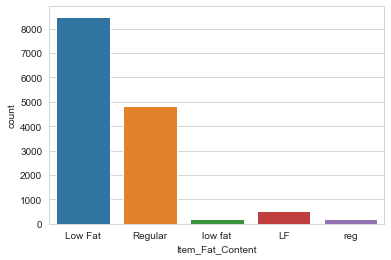

In [9]:
sns.countplot('Item_Fat_Content', data=df);

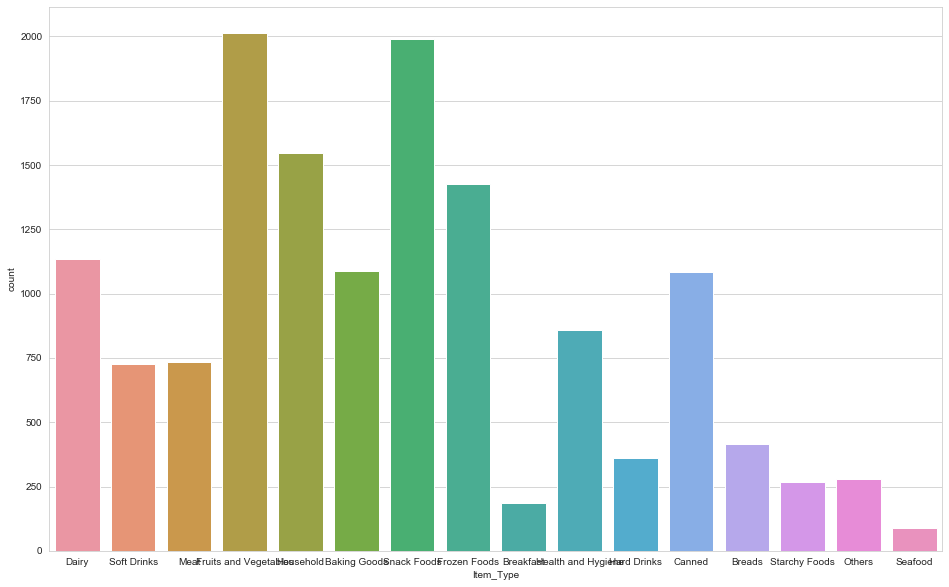

In [10]:
plt.figure(figsize=(16, 10))
sns.countplot('Item_Type', data=df);

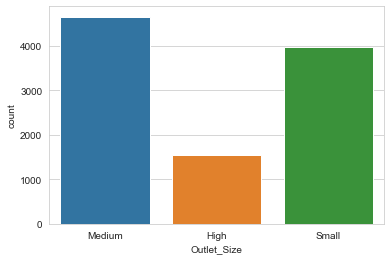

In [11]:
sns.countplot('Outlet_Size', data=df);

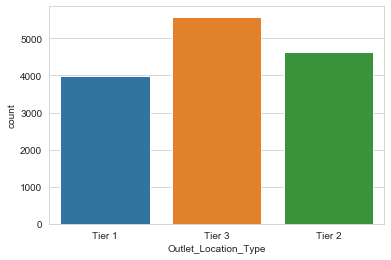

In [12]:
sns.countplot('Outlet_Location_Type', data=df);

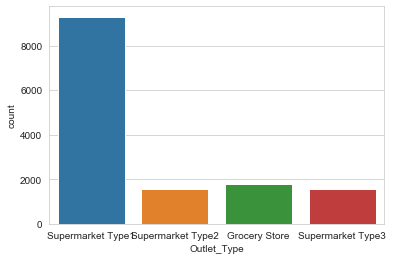

In [13]:
sns.countplot('Outlet_Type', data=df);

1. **Item_Fat_Content** część 'Low fat' zostało nazwane LF lub 'low fat'. Natomiast niektóre Regular są jako reg
2. **Item_Type** niektóre kategorie można połączyć
3. **Outlet_Type** można ew. polączyć typ2 i 3 w jedno

## 3. Czyszczenie danych

Ten krok z reguły wiąże się z wprowadzaniem brakujących danych oraz decyzją co robimy z wartościami odstającymi. Usuwanie wartości odstających jest ważne przy technikach regresyjnych, natomiast algorytmy drzewowe są odporne na wartości odstające.

**W tym momencie zajmiemy się wprowadzeniem brakujących danych**

In [14]:
# #Determine the average weight per item:
# item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')

# #Get a boolean variable specifying missing Item_Weight values
# miss_bool = df['Item_Weight'].isnull() 

# #Impute data and check #missing values before and after imputation to confirm
# print('Orignal #missing: %d'% sum(miss_bool))
# df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
# print('Final #missing: %d'% sum(df['Item_Weight'].isnull()))

item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')
miss_bool = df['Item_Weight'].isnull() 

print('Orignal #missing: %d'% sum(miss_bool))

df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])


print('Final #missing: %d'% sum(df['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


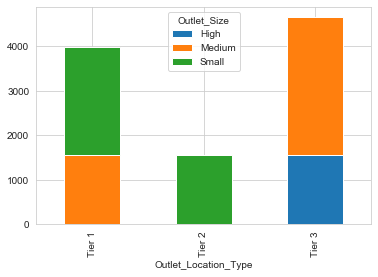

In [15]:
ct = pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Size'])
ct.plot.bar(stacked=True);

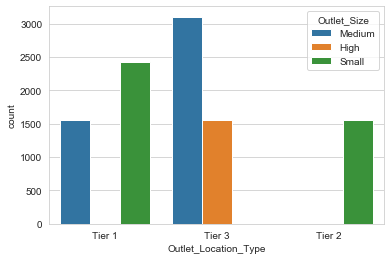

In [16]:
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Size', data=df );

In [17]:
print(sum(df['Outlet_Size'].isnull()))

df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
print(sum(df['Outlet_Size'].isnull()))

4016
0


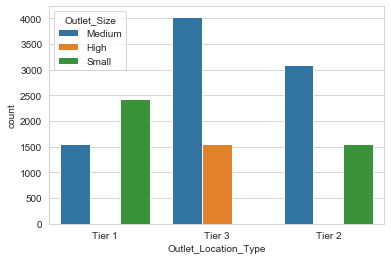

In [18]:
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Size', data=df );

In [19]:
# Modyfikacja Item_Visibility

print("Początkowa liczba 0: {}".format(sum(df['Item_Visibility'] == 0)))

df['Item_Visibility'] = df['Item_Visibility'].mask(df['Item_Visibility'] == 0, df['Item_Visibility'].mean())

print("Liczba 0 po modyfikacji: {}".format(sum(df['Item_Visibility'] == 0)))

Początkowa liczba 0: 879
Liczba 0 po modyfikacji: 0


In [20]:
# Połączenie typów

df['Polaczone_Typy'] = df['Item_Identifier'].apply(lambda x: x[0:2])

df['Polaczone_Typy'] = df['Polaczone_Typy'].map({'FD':'Jedzenie',
                                                'NC': 'Niejadalne',
                                                'DR':'Picie'})

df['Polaczone_Typy'].value_counts()

Jedzenie      10201
Niejadalne     2686
Picie          1317
Name: Polaczone_Typy, dtype: int64

In [21]:
df['Wiek_Sklepu'] = 2013 - df['Outlet_Establishment_Year']
df['Wiek_Sklepu'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Wiek_Sklepu, dtype: float64

In [22]:
# modyfikacja kategorii Item_Fat_Content

print('Oryginalne kategorie:')
print(df['Item_Fat_Content'].value_counts())

print('\n'+ 'Zmodyfikowane kategorie:')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                       'reg':'Regular',
                                                       'low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())

Oryginalne kategorie:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Zmodyfikowane kategorie:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [23]:
# Dodanie nowej kategorii niejadalne

df.loc[df['Polaczone_Typy']=='Niejadalne', 'Item_Fat_Content'] = 'Niejadalne'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Niejadalne    2686
Name: Item_Fat_Content, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
Polaczone_Typy               14204 non-null object
Wiek_Sklepu                  14204 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB


In [25]:
# Konwertowanie wwartości kategorycznych na numeryczne

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Nowa zmienna dla "Outlet"
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Polaczone_Typy','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [27]:
#One Hot Coding:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Polaczone_Typy','Outlet'])

In [28]:
df.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Wiek_Sklepu                    int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Polaczone_Typy_0               uint8
Polaczone_Typy_1               uint8
Polaczone_Typy_2               uint8
Outlet_0                       uint8
O

In [29]:
df[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2
0                   1                   0                   0
1                   0                   0                   1
2                   1                   0                   0
3                   0                   0                   1
4                   0                   1                   0
5                   0                   0                   1
6                   0                   0                   1
7                   1                   0                   0
8                   0                   0                   1
9                   0                   0                   1

### Eksportowanie danych

In [30]:
# Pozbycie się kolumn, które zmieniły typ
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Podział na testtowe i treningowe
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Pozbycie się zbędnych kolumn:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Eksportowaanie 
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Anaconda3\envs\av\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Tworzenie modelów

In [45]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### Regresja Liniowa


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.43 | Min - 1075 | Max - 1210


C:\Anaconda3\envs\av\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


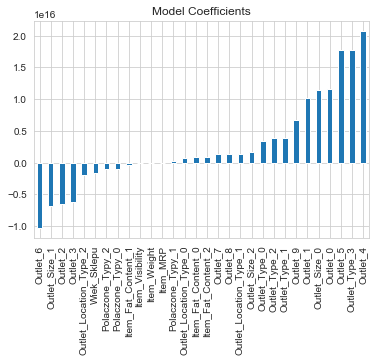

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

Współczynniki mają duży rozstrzał, co oznacza przeuczenie

### Ridge Regression Model:


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.72 | Min - 1076 | Max - 1217


C:\Anaconda3\envs\av\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


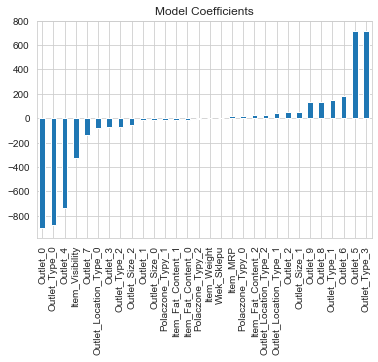

In [47]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

Model jest trochę lepszy, ale niewiele

### Model Drzewa decyzyjnego:


Model Report
RMSE : 1060
CV Score : Mean - 1091 | Std - 45.27 | Min - 1014 | Max - 1181


C:\Anaconda3\envs\av\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


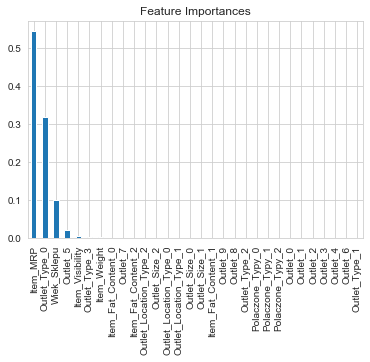

In [48]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

RMSE wynosi 1060, natomiast średnia CV = 1091, co oznacza, że model lekko się przeucza, spróbujemy zmieniś parametry


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


C:\Anaconda3\envs\av\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


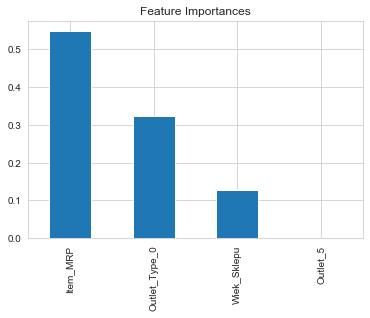

In [50]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Wiek_Sklepu']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')